In [91]:
%load_ext autoreload
%autoreload 2

import pickle
import chess
import numpy as np
from tensorflow import keras
from cam_chess import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
model = keras.models.load_model('first_model.h5')

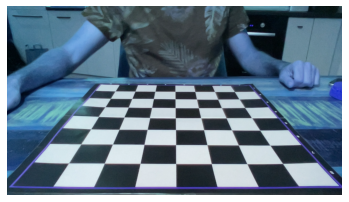

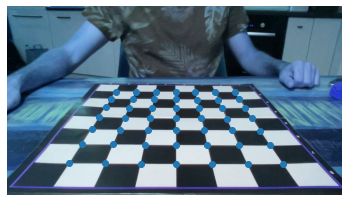

In [49]:
empty = capture()
corners = detect_checkerboard(empty)

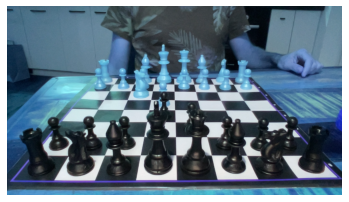

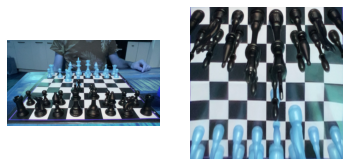

In [24]:
fields = capture_pipeline(corners)

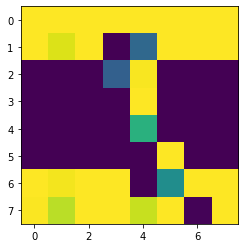

In [47]:
prob = model(np.stack(fields.values())).numpy().flatten()
plt.imshow(prob.reshape(8, 8).T[::-1])

Not bad, especially knowing that this was obtained on different lighting conditions and changed board surface!

# Tracking a small game

Let's record a quick game so that we can prototype full solution using it.

In [51]:
game = []

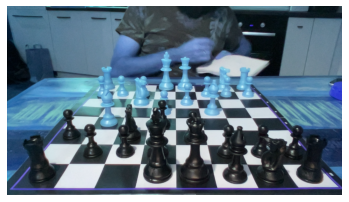

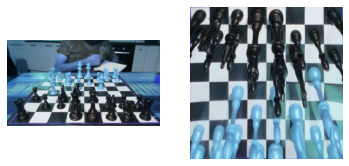

In [62]:
game.append(capture_pipeline(corners))

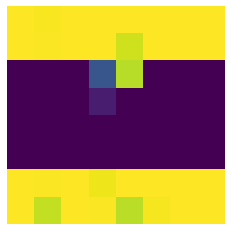

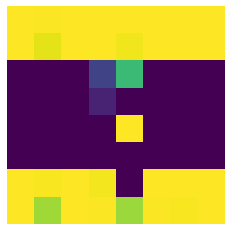

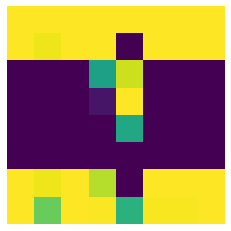

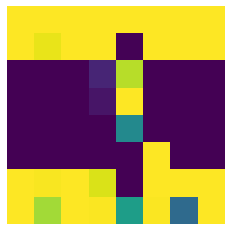

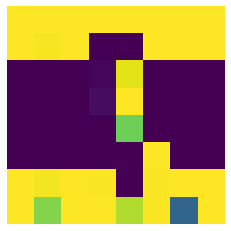

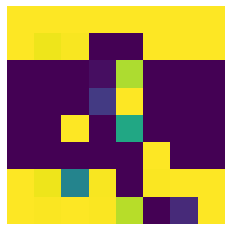

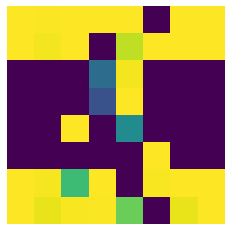

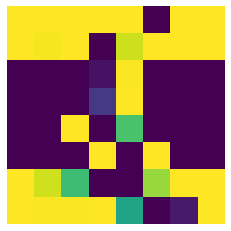

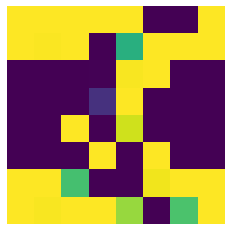

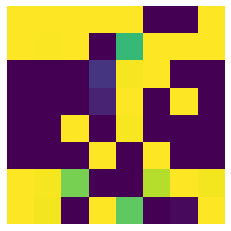

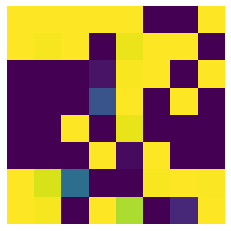

In [65]:
for g in game:
    prob = model(np.stack(g.values())).numpy().flatten()
    plt.imshow(prob.reshape(8, 8).T[::-1])
    plt.axis('off')
    plt.show()

Looks decent for now.

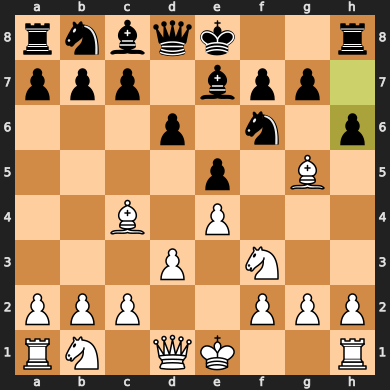

In [82]:
board = chess.Board()
for move in ['e4', 'e5', 'Nf3', 'd6', 'Bc4', 'Be7', 'd3', 'Nf6', 'Bg5', 'h6']:
    board.push_san(move)
board

In [88]:
pickle.dump(game, open('small_game.pkl', 'wb'))

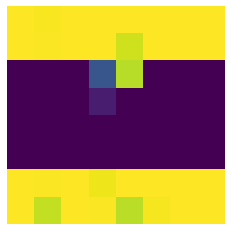

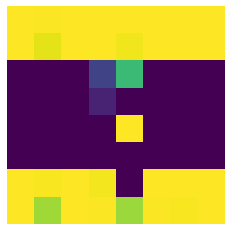

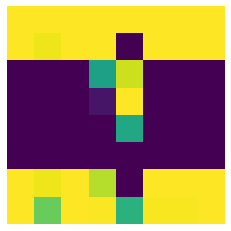

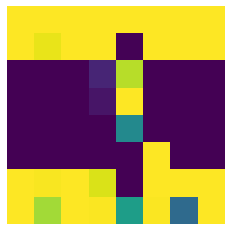

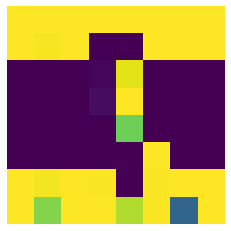

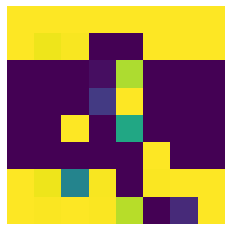

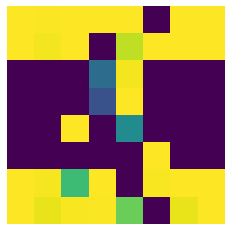

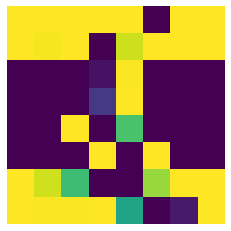

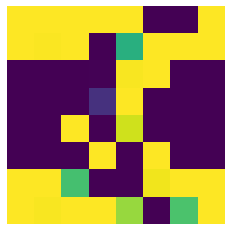

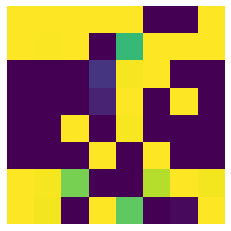

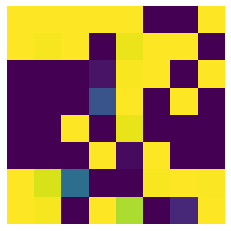

In [99]:
probs = [predict(model, fields) for fields in game]
pickle.dump(probs, open('small_game_probs.pkl', 'wb'))